#Module 5a - Language Models
In this Module 5a notebook, we explore pre-trained language models (PLM), Hugging Face transformers for API access to PLM, and its application in 10 distinct  NLP/U tasks.

##Defining Pre-trained Language Models (PLM)

The invention of pre-trained language models (PLM) has been a paradigm shift, it has transformed natural language processing (NLP) into natural language understanding (NLU), while also signifying the first practical advent into Artificial General Intelligence (AGI). At present, language models are the most sophisticated neural network architectures consisting hundreds of neural layers, thousands of neurons,  billions of learnable parameters and terabytes of training data. These models are trained with high performance hardware over several weeks/months. PLM contain generalised intelligence of the "language", and not specific to any "processing task". 

##Fine-tuning for NLP
The language model is created/generated using large volumes of free text, such as the complete Wikipedia or all Google books. And then to apply this PLM into a "specific" NLP task, a task-specific, (usually) annotated dataset is  used to fine-tune the PLM. This is depicted in the following diagram.

<img src="http://drive.google.com/uc?export=view&id=1ZqX0KWOcrkt9Irm_7Wg2egtvIYWMldnu" />






##Hugging Face 

Hugging Face, Inc. is an American AI company that started off developing a chatbot app for teenagers and then branched into becoming a platform for democratizing machine learning.

Hugging Face is 'gold-standard' for its transformers API and the Hugging face Hub. 

###Hugging Face Hub 
The hub is an AI community (much like GitHub is for software) for  sharing and explore PLMS, other AI models and datasets. It contains thousands of fine-tuned language models that can be used over few lines of the code.[Hugging Face Model Hub](https://huggingface.co/models )

###Hugging Face Transformers

<img src="http://drive.google.com/uc?export=view&id=1ZEG7ikWynrsyHlBmk-cq_PeKs5KTOtBf" width="400" />

Hugging Face transformers provides APIs and tools to download and train state-of-the-art pre-trained language models. Currently, transformers support more than 150 different pre-trained models. 

Let's explore the following NLP/U tasks using the Hugging Face transformers. 

1.   Sentiment analysis
2.   Table question answering
3.   Question Answering
4.   Text generation
5.   Zero-shot classification
6.   Text summarization
7.   Mask language modelling
8.   Named entity recognition
9.   Sarcasm detection
10. Translation



##Installing libraries

When the code block has fully executed, the Python runtime will automatically restart to install and activate the libraries. This may take some time, and please ignore any messages saying runtime crashed.

In [ ]:
!pip install sentencepiece
!pip install transformers
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.9.0+${CUDA}.html
import os
os.kill(os.getpid(), 9)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 19.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 35.8 MB/s 
     |████████████████████████████████| 7.6 MB 59.0 MB/s 
     |████████████████████████████████| 182 kB 67.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.9.0+.html
  Created wheel for torch-scatter: filename=torch_scatter-2.0.9-cp37-cp37m-linux_x86_64.whl size=274489 sha256=15d25b48b42991d44e99fbb6d6cedaa03af1c42d62fe858a3729b0e289ae9177
  Stored in directory: /root/.cache/pip/wheels/dd/57/a3/42ea193b77378ce634eb9454c9bc1e3163f3b482a35cdee4d1
Successfully built torch-scatter


##Import libraries

In [ ]:
from transformers import AutoModelForTableQuestionAnswering, AutoTokenizer, pipeline
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

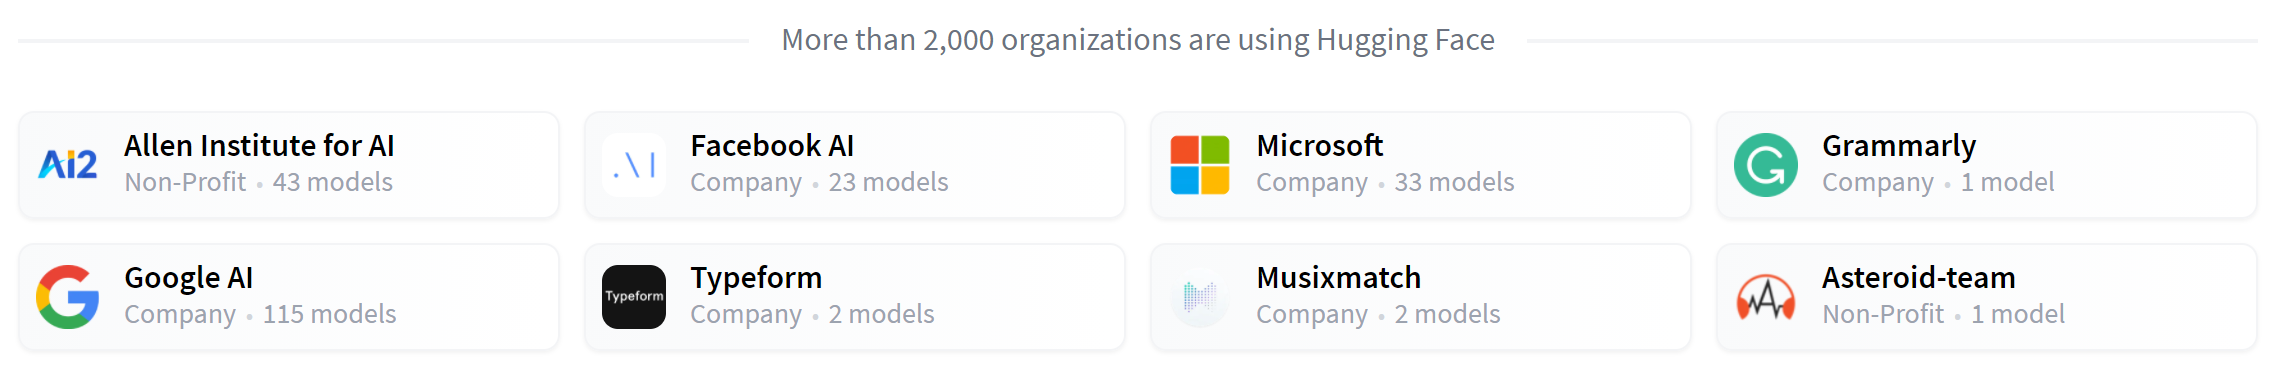

##The Hugging Face Pipeline()

The most basic object in the 🤗 Transformers library is the pipeline().  Pipelines are objects that abstract complex code into a simple API. Each AI task has an associated pipeline(), however, it is simpler to use the general pipeline() abstraction which contains all the task-specific pipelines. The pipeline() automatically loads a default model and a preprocessing class for a selected task.




Text passed into a pipeline is subject to three phases:

* Pre-process - the text is preprocessed and tokenized into a format the model can process.
* AI task - the model completes the AI task 
* Post-process - AI task output is further processed back to text that is meaningful to the user.

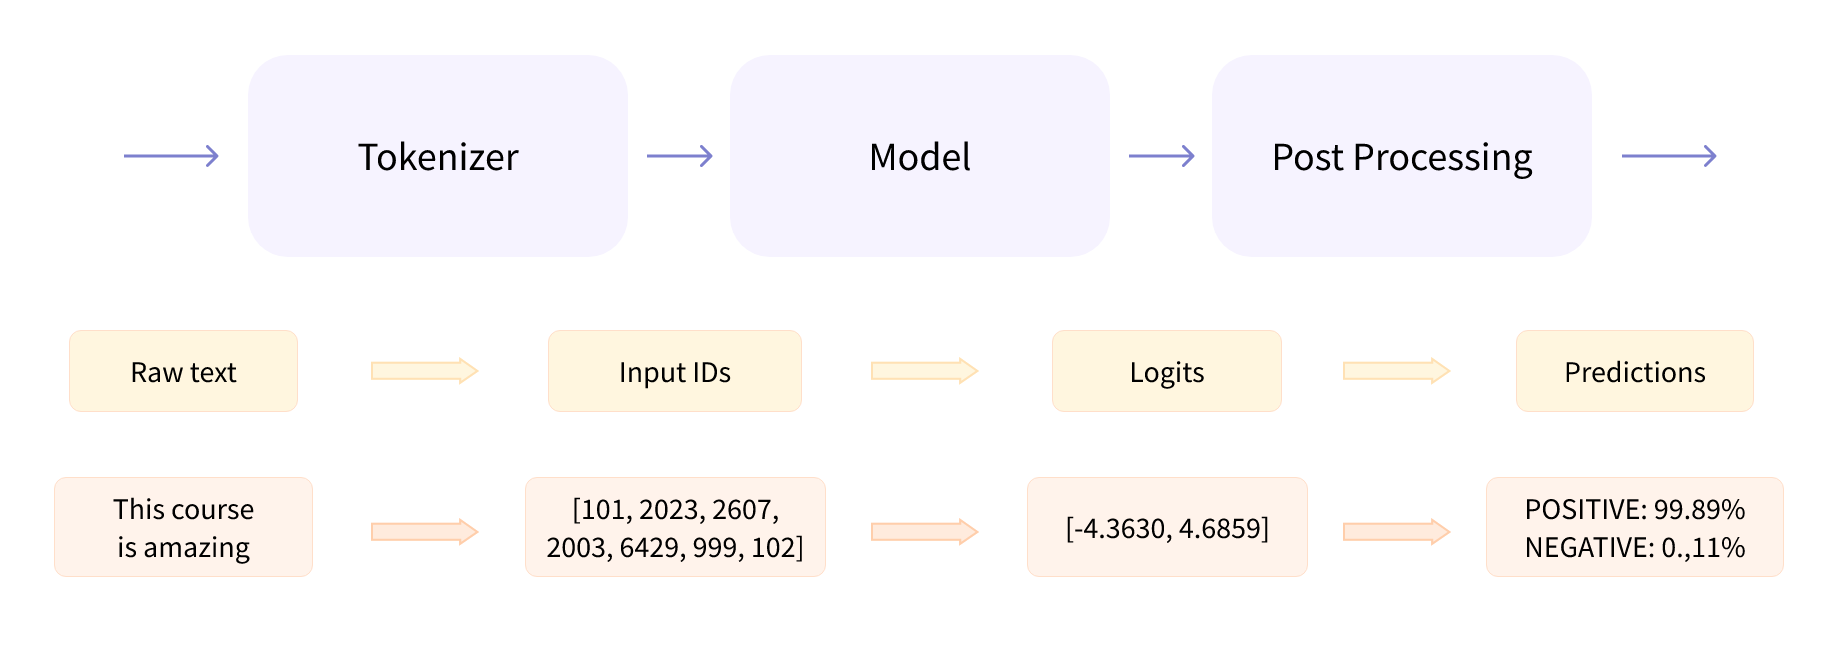

Like other neural networks, Transformer models cannot process raw text directly, so the first step of the pipeline is to convert the text inputs into numbers by using a tokenizer, The tokenizer performs the following, 

* Split the input text into words, subwords, or symbols (like punctuation), these are called tokens
* Map each token to an integer
* Add meta-data such as start or end of a sentence 

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer

In [ ]:
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
raw_text = [
    "This is an AI course for Natural Language Processing",
    "ten things I hate about you",
]

inputs = tokenizer(raw_text, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[ 101, 2023, 2003, 2019, 9932, 2607, 2005, 3019, 2653, 6364,  102],
        [ 101, 2702, 2477, 1045, 5223, 2055, 2017,  102,    0,    0,    0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]])}


The tokenizer output is a dictionary containing two keys, input_ids and attention_mask. input_ids contains two rows of integers (one for each sentence) that are the unique identifiers of the tokens in each sentence.

The 'convert_ids_to_tokens' function of the tokenizer class can be used to decode the ids to tokens. 

In [ ]:
tokenizer.convert_ids_to_tokens([101,  1045,  1005,  2310,  2042])

['[CLS]', 'i', "'", 've', 'been']

Let's predict the sentiment for the inputs.

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(model_name)
outputs = model(**inputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predictions

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

tensor([[0.0781, 0.9219],
        [0.9895, 0.0105]], grad_fn=<SoftmaxBackward0>)

##1. Sentiment analysis

Here the PLM classifies positive or negative sentiment along with a probability score. 

In [ ]:
sa_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

By default, this pipeline selects a particular pretrained model that has been fine-tuned for sentiment analysis in English. The model is downloaded and cached when you create the classifier object. If you rerun the command, the cached model will be used instead and there is no need to download the model again.

In [ ]:
def sentiment_extract(text):
  result = sa_pipeline(text)[0]
  print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

In [ ]:
sentiment_extract('I love La Trobe AI')

label: POSITIVE, with score: 0.9995


In [ ]:
sentiment_extract('I do not love Python')

label: NEGATIVE, with score: 0.9989


In [ ]:
sentiment_extract('10 things I hate about you')

label: NEGATIVE, with score: 0.9823


##2. Table question answering
Here the language models are specifically trained for understanding a given table and answer questions accordingly. There are many models specialized on this task in hugging face [model hub](https://huggingface.co/models?pipeline_tag=table-question-answering&sort=downloads), here we will be using [Google's TAPAS model](https://huggingface.co/google/tapas-base-finetuned-wtq?query=How+many+stars+does+the+transformers+repository+have%3F&table=%7B%22Repository%22%3A%5B%22Transformers%22%2C%22Datasets%22%2C%22Tokenizers%22%5D%2C%22Stars%22%3A%5B%2236542%22%2C%224512%22%2C%223934%22%5D%2C%22Contributors%22%3A%5B%22651%22%2C%2277%22%2C%2234%22%5D%2C%22Programming+language%22%3A%5B%22Python%22%2C%22Python%22%2C%22Rust%2C+Python+and+NodeJS%22%5D%7D).

[Link to further reading](https://huggingface.co/docs/transformers/v4.17.0/en/main_classes/pipelines#transformers.TableQuestionAnsweringPipeline)

Let's use a sample data table and try to ask questions from it. As the data table, we will use a sample data file from Ookla which shows fastest ISPs by Australian city in 2017 [(Source)](https://www.lifehacker.com.au/2017/11/revealed-the-fastest-isps-in-each-australian-city/)

Download and load the data table.

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1TxyQU9v16GfLz10NvnyJZhgVwECxmyqe' -O 'data_ISP.csv'
datatable = pd.read_csv(r"data_ISP.csv")

--2022-11-22 05:21:18--  https://docs.google.com/uc?export=download&id=1TxyQU9v16GfLz10NvnyJZhgVwECxmyqe
Resolving docs.google.com (docs.google.com)... 173.194.218.101, 173.194.218.138, 173.194.218.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.218.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-8g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bfj2a4egntv17vi3usj3u2m5tmvq3km1/1669094475000/03983047858725985766/*/1TxyQU9v16GfLz10NvnyJZhgVwECxmyqe?e=download&uuid=a24a51ad-7852-470f-b5a1-71729855afcd [following]
--2022-11-22 05:21:18--  https://doc-00-8g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bfj2a4egntv17vi3usj3u2m5tmvq3km1/1669094475000/03983047858725985766/*/1TxyQU9v16GfLz10NvnyJZhgVwECxmyqe?e=download&uuid=a24a51ad-7852-470f-b5a1-71729855afcd
Resolving doc-00-8g-docs.googleusercontent.com (doc-00-8g-docs.googleusercontent.com)... 173.194.211.132, 2607:

In [ ]:
display(datatable)

,City,Download (Mbps),Upload (Mbps),Fastest ISP,Speed Score
0,"Adelaide, South Australia",21.93,10.74,TPG,31.09
1,"Brisbane, Queensland",35.08,23.56,Optus,49.19
2,"Canberra, Australian Capital Territory",32.47,14.12,¡¡Net,35.21
3,"Darwin, Northern Territory",29.62,13.89,¡¡Net,34.34
4,"Geelong, Victoria",67.05,22.15,¡¡Net,94.26
5,"Gold Coast, Queensland",32.17,9.07,Optus,91.37
6,"Hobart, Tasmania",27.25,11.74,Telstra,27.80
7,"Melbourne, Victoria",31.63,20.58,Spirit,44.29
8,"Newcastle, New South Wales",33.97,14.74,MyRepublic,57.36
9,"Perth, Western Australia",17.90,7.59,TPG,28.44


Lets convert dataframe to a string to be passed through language model.

In [ ]:
datatable = datatable.astype(str)

The previous example, we have used the default model for the task at hand, but here we choose a particular model from the Hub to use in a pipeline for this task. Go to the [Model Hub ](https://huggingface.co/models) and click on the corresponding tag on the left to display only the supported models for this task. Here we are going to use Google TAPAS model.

In [ ]:
# Load model & tokenizer
model = 'google/tapas-small-finetuned-wtq'
tapas_model = AutoModelForTableQuestionAnswering.from_pretrained(model)
tapas_tokenizer = AutoTokenizer.from_pretrained(model)

# Initializing pipeline
table_qa_pipeline = pipeline('table-question-answering', model=tapas_model, tokenizer=tapas_tokenizer)

Downloading:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/117M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/490 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/262k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/154 [00:00<?, ?B/s]

We can come up with the following function to generate and display answers.

In [ ]:
def table_question_answering(question,datatable):
    print('Question :',question)
    result = table_qa_pipeline({'table': datatable,'query':question})
    answer = result['cells']
    print('Answer :',answer)

In [ ]:
prediction = table_question_answering('What is the highest download (Mbps) speed?',datatable)

Question : What is the highest download (Mbps) speed?
Answer : ['67.05']


In [ ]:
prediction = table_question_answering('Which city has the highest download (Mbps) speed',datatable)

Question : Which city has the highest download (Mbps) speed
Answer : ['Geelong, Victoria']


In [ ]:
prediction = table_question_answering('fastest ISP of queensland?',datatable)

Question : fastest ISP of queensland?
Answer : ['Optus']


In [ ]:
prediction = table_question_answering('Which city has the highest speed score?',datatable)

Question : Which city has the highest speed score?
Answer : ['Wollongong, New South Wales']


##3. Question answering

Other than table question answering, language models can be used to answer question based on the textual information provided known as the context. So the answer will be a portion from the same context. 

[Link to further reading](https://huggingface.co/docs/transformers/v4.17.0/en/main_classes/pipelines#transformers.QuestionAnsweringPipeline)

In [ ]:
qa_pipeline = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/261M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
def question_answering(question, context):
    print('Question :',question)
    result = qa_pipeline(question=question, context=context)
    answer = result['answer']
    print('Answer :',answer)

In [ ]:
context = r"""The Evolved Pocket System (EPS) is purely IP based. 
Both real time services and datacom services will be carried by the IP protocol. 
The IP address is allocated when the mobile is switched on and released when switched off. 
The new access solution, LTE, is based on OFDMA (Orthogonal Frequency Division Multiple Access) 
and in combination with higher order modulation (up to 640AM), large bandwidths (up to 20 MHz) 
and spatial multiplexing in the downlink (up to 4x4) high data rates can be achieved. 
The highest theoretical peak data rate on the transport channel is 75 Mbps in the uplink, 
and in the downlink, using spatial multiplexing, the rate can be as high as 300 Mbps. """

In [ ]:
prediction = question_answering('What is OFDMA?',context)

Question : What is OFDMA?
Answer : Orthogonal Frequency Division Multiple Access


In [ ]:
prediction = question_answering('When is IP of EPS given?',context)

Question : When is IP of EPS given?
Answer : when the mobile is switched on and released when switched off


In [ ]:
prediction = question_answering('What is the theoretical peak data rate in LTE?',context)

Question : What is the theoretical peak data rate in LTE?
Answer : 75 Mbps


In [ ]:
prediction = question_answering('What is the lowest rate when using spatial multiplexing?',context)

Question : What is the lowest rate when using spatial multiplexing?
Answer : 300 Mbps


In [ ]:
prediction = question_answering('What is carried by the IP protocol?',context)

Question : What is carried by the IP protocol?
Answer : real time services and datacom services


In [ ]:
prediction = question_answering('What is datacom services?',context)

Question : What is datacom services?
Answer : real time


##4. Text generation
Language models can also be used for automated/intelligent text generation.  Here we provide several seed words as the prompt.

[Link to further reading](https://huggingface.co/docs/transformers/v4.17.0/en/main_classes/pipelines#transformers.TextGenerationPipeline)

In [ ]:
generator_pipeline = pipeline(task="text-generation")
import torch
torch.manual_seed(42)
def text_generation(prompt):
    result = generator_pipeline(prompt,max_length=1000)[0]
    print('Generated Text :\n',result['generated_text'])

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
text_generation("Artificial Intelligence in the future of work")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text :
 Artificial Intelligence in the future of work, said Gül, "if people are actually interested in science, they will always find things like physics that they liked, too. In the next generation, though, it might be useful to go farther."

"We're seeing this in many industries right now," she added, referring to advanced computer graphics such as Photoshop, which show people a larger screen than their average. At the end of 2015, Gül predicted that by 2021, most of the advanced digital and visual technologies will be available in all the industries. "The future of work is for us to think clearly about the next wave."

Read more about Google for Life: Life as a Science:

Google on the Fast, Slow & Irreversible Rise of Our Personal Computer


##5. Zero-shot classification
One of the main challenges in building classification models is the scarcity of annotated data. Zero-shot classification aims to address this challenge (to some extent) by leveraging a language model to classify text  alongside candidate labels. This approach is based on natural language inference techniques with learned embeddings, instead of fine-tuning or other forms of learning. It can directly return probability scores for any number of labels.

[Link to further reading](https://huggingface.co/docs/transformers/v4.17.0/en/main_classes/pipelines#transformers.ZeroShotClassificationPipeline)

In [ ]:
classification_pipeline = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Let's try out some examples.

In [ ]:
classification_pipeline(
    "This is a course on AI",
    candidate_labels=["education", "politics", "business"],
)

{'sequence': 'This is a course on AI',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.49753615260124207, 0.37180590629577637, 0.13065795600414276]}

In [ ]:
classification_pipeline(
    "I would like to upgrade my data plan",
    candidate_labels=["Internet", "Phones", "Telecom", "Sim card"],
)
# change "data" to "phone" 

{'sequence': 'I would like to upgrade my data plan',
 'labels': ['Internet', 'Sim card', 'Telecom', 'Phones'],
 'scores': [0.45959290862083435,
  0.30820345878601074,
  0.1736188381910324,
  0.058584775775671005]}

##6. Text summarization

Language models can also be used to generate a summary of a given text.

[Link to further reading](https://huggingface.co/docs/transformers/v4.17.0/en/main_classes/pipelines#transformers.SummarizationPipeline)

In [ ]:
summarization_pipeline = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [ ]:
text1 = """We’re committed to using our resources, relationships and capabilities to make a positive contribution in our society. We're working to improve the environmental performance of our operations and supporting our 
community to join us on the journey towards a more sustainable and resilient future. Operating with integrity, our corporate governance processes strengthen our corporate performance and accountability. 
We’re tracking our progress against set goals and sharing our innovations and achievements through annual reporting. Our Vision is to embed sustainability in our culture, values, decision-making, operations, products and services to create a sustainable business.
We focus on the most significant areas where our unique skills, resources and expertise can help create a positive impact on current and future generations."""

In [ ]:
text2 = """We want to thank you for your patience and support as we worked through the enormous complexity of responding to the cyberattack on Optus customers. 
This cyberattack was a deliberate planned criminal attack. Thanks to the fast action and close collaboration between the teams at Optus and the Australian Cyber Security 
Centre and the Australian Federal Police, we are not currently aware of any harm coming to any customers whose information was exposed through the misuse of the data and 
are working hard to keep it that way. However, the cyberattack happened on our watch and we’re not going to offer excuses - just a commitment to do everything we can to
 protect you in the future. We know words won’t make this right. Only solid actions will. We’re setting out to make the following commitments to be better as a company, 
 for our customers and for the communities we call home. """

In [ ]:
summary=summarization_pipeline(text2, max_length=130, min_length=30, do_sample=False)[0]

In [ ]:
print(summary['summary_text'])

 This cyberattack was a deliberate planned criminal attack on Optus customers . Optus is not currently aware of any harm coming to any customers whose information was exposed . The cyberattack happened on our watch and we're not going to offer excuses - just a commitment to do everything we can to protect you in the future .


##7. Masked language modelling

Masked language modelling is the task of masking words in a sequence and prompting the model to fill that mask with an appropriate word. Here the language model will consider the context and select the most suitable word to fill the mask. This function is useful to determine contextual words/phrases for a given sentence. 

In [ ]:
unmasker_pipeline = pipeline("fill-mask")

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/331M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
def unmask(text):
  results = unmasker_pipeline(text)
  for prediction in results:
    print({'token':prediction['token_str'], 'score':prediction['score'], 'output':prediction['sequence']})

In [ ]:
unmask(f"HuggingFace is creating a {unmasker_pipeline.tokenizer.mask_token} that the community uses to solve NLP tasks.")

{'token': ' tool', 'score': 0.17927497625350952, 'output': 'HuggingFace is creating a tool that the community uses to solve NLP tasks.'}
{'token': ' framework', 'score': 0.11349403858184814, 'output': 'HuggingFace is creating a framework that the community uses to solve NLP tasks.'}
{'token': ' library', 'score': 0.05243556201457977, 'output': 'HuggingFace is creating a library that the community uses to solve NLP tasks.'}
{'token': ' database', 'score': 0.03493537753820419, 'output': 'HuggingFace is creating a database that the community uses to solve NLP tasks.'}
{'token': ' prototype', 'score': 0.02860264666378498, 'output': 'HuggingFace is creating a prototype that the community uses to solve NLP tasks.'}


### Bias and limitations

Although language modesla re powerful AI models, they contain inherent biases as they are trained on large volumes of text data which can still contain incorrect or inappropriate content. 
If your intent is to use a pretrained model or a fine-tuned version in production, please be aware that, while these models are powerful tools, they come with limitations. The biggest of these is that, to enable pretraining on large amounts of data, researchers often scrape all the content they can find, taking the best as well as the worst of what is available on the internet.

In [ ]:
result = unmasker_pipeline("This man works as a <mask>.")
print([r["token_str"] for r in result])

result = unmasker_pipeline("This woman works as a <mask>.")
print([r["token_str"] for r in result])

[' translator', ' consultant', ' bartender', ' waiter', ' courier']
[' waitress', ' translator', ' nurse', ' bartender', ' consultant']


##8. Named entity recognition

We studied conventional NER in Module 2. Here we use language models which are highly capable of recognising named entities (single and multiple words) such as a person, an organisation or a location. 











In [ ]:
ner_pipeline = pipeline("ner")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

In [ ]:
sequence = """Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO,
therefore very close to the Manhattan Bridge which is visible from the window. Optus is Australia's favourite telecommunication provider"""

for entity in ner_pipeline(sequence):
    print(entity)

{'entity': 'I-ORG', 'score': 0.99965596, 'index': 1, 'word': 'Hu', 'start': 0, 'end': 2}
{'entity': 'I-ORG', 'score': 0.99145097, 'index': 2, 'word': '##gging', 'start': 2, 'end': 7}
{'entity': 'I-ORG', 'score': 0.99791056, 'index': 3, 'word': 'Face', 'start': 8, 'end': 12}
{'entity': 'I-ORG', 'score': 0.99953914, 'index': 4, 'word': 'Inc', 'start': 13, 'end': 16}
{'entity': 'I-LOC', 'score': 0.9995034, 'index': 11, 'word': 'New', 'start': 40, 'end': 43}
{'entity': 'I-LOC', 'score': 0.9992804, 'index': 12, 'word': 'York', 'start': 44, 'end': 48}
{'entity': 'I-LOC', 'score': 0.99945766, 'index': 13, 'word': 'City', 'start': 49, 'end': 53}
{'entity': 'I-LOC', 'score': 0.9893991, 'index': 19, 'word': 'D', 'start': 79, 'end': 80}
{'entity': 'I-LOC', 'score': 0.96679837, 'index': 20, 'word': '##UM', 'start': 80, 'end': 82}
{'entity': 'I-LOC', 'score': 0.9536874, 'index': 21, 'word': '##BO', 'start': 82, 'end': 84}
{'entity': 'I-LOC', 'score': 0.9796204, 'index': 28, 'word': 'Manhattan', 'st

##9. Sarcasm Detection

Language models also can be used to recognize implied meaning such as sarcasm and irony. Let's try this out. 

In [ ]:
from transformers import AutoTokenizer, AutoModelWithLMHead
tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-sarcasm-twitter")

model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-sarcasm-twitter")

def eval_conversation(text):

  input_ids = tokenizer.encode(text + '', return_tensors='pt')

  output = model.generate(input_ids=input_ids, max_length=3)
  
  dec = [tokenizer.decode(ids) for ids in output]
  # print(dec)
  label = dec[0]
  if('normal' in label):return 'No sarcasm'
  else:return 'sarcasm'

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/892M [00:00<?, ?B/s]

In [ ]:
text1 = r"""Trump is back on Twitter"""
print(eval_conversation(text1))
text2 = r"""I am loving this weather in Melbourne"""
print(eval_conversation(text2))
text3 = """What an awful place. I hope to go there someday.”"""
print(eval_conversation(text3))
text4 = "I would agree with you, but then we would both be wrong."
print(eval_conversation(text4))
text5 = "I agree with you"
print(eval_conversation(text5))

sarcasm
No sarcasm
sarcasm
sarcasm
sarcasm


## 10. Translation

For translation, a default model along with a language pair in the task name (such as "translation_en_to_fr") can be provided. But it is easier to pick from the [Model Hub](https://huggingface.co/models). Let's try translating from French to English:

In [ ]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")

Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/301M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/802k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/778k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

In [ ]:
translator("Ce cours porte sur l'Intelligence Artificielle")

[{'translation_text': 'This course focuses on Artificial Intelligence'}]

---------------------
End of OptusU_AIN_Module_5a_Language Models.ipynb